# arcsolver

> A Python library for automatically solving ARC challenges using Claude and object-centric modeling.

This library contains tools for visualizing, analyzing and solving tasks from the Abstraction and Reasoning Corpus (ARC) challenge dataset.

Interaction with Claude 

## Installation

Install latest from the GitHub [repository][repo]:

```sh
$ pip install git+https://github.com/agemoai/arcsolver.git
```

or from [pypi][pypi]


```sh
$ pip install arcsolver
```


[repo]: https://github.com/agemoai/arcsolver
[docs]: https://agemoai.github.io/arcsolver/
[pypi]: https://pypi.org/project/arcsolver/

## Key Features

- **Task Management:** Load and visualize ARC tasks with the `ArcTask` class
- **Object-Centric Modelling:** A set of primitive classes for representing grid objects and transformations
- **LLM Integration:** Designed to use Claude Sonnet 3.5 for automated task analysis and solution generation
- **Extensible Architecture:** Easy to add new primitives and helper functions to enhance solving capabilities

## Quick Start

### Task Representation

The `task` module provides classes for working with ARC tasks

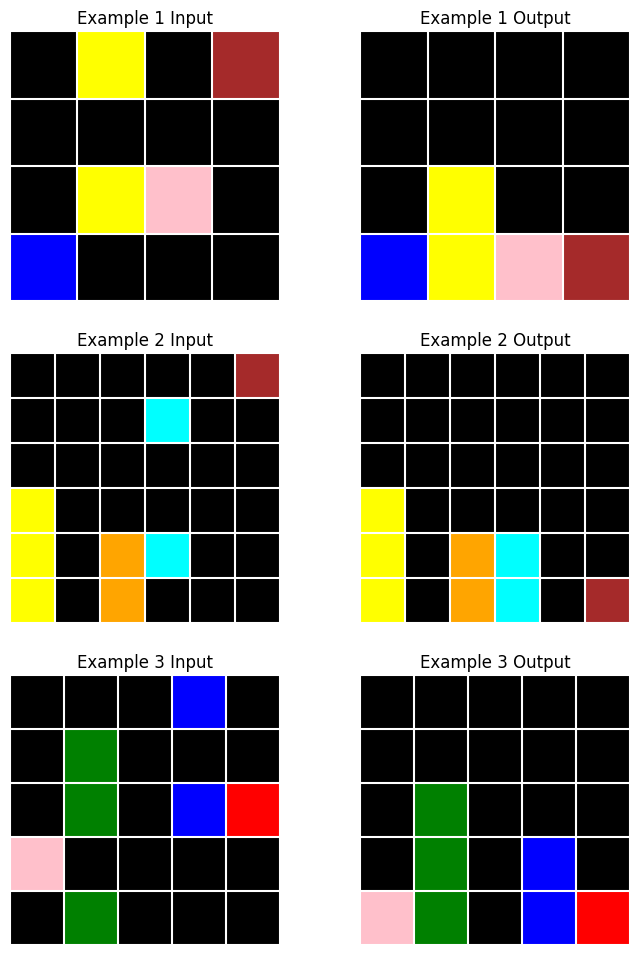

In [ ]:
from arcsolver.task import ArcGrid, ArcPair, ArcTask

task = ArcTask('1e0a9b12'); task.plot()

An `ArcTask` comprises a list of input-output example `ArcPair`s, each of which holds two `ArcGrid`s. Each class has convenient `plot` methods for visualization or directly outputting to base64-encoded strings that can be passed to Claude

In [ ]:
print(f"Input grid 1 plot: {task.train[0].input.plot(to_base64=True)[:20]}...")

Input grid 1 plot: b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01H'...


### Object-centric Models

The `ocm` module provides a set of primitive classes for constructing object-centric models of ARC grids

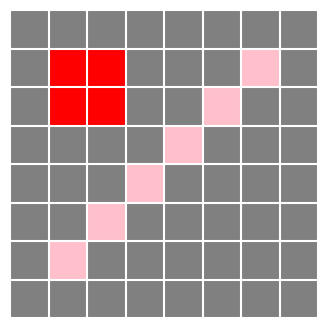

In [ ]:
from arcsolver.ocm import Vector, Rectangle, Line, Grid, Color, Direction

grid = Grid(
    size=Vector(8,8),
    background_color=Color('grey'),
    objects=[
        Rectangle(position=Vector(1,1), size=Vector(2,2), color=Color('red')),
        Line(position=Vector(6,1), direction=Direction.NE, length=6, color=Color('pink'))
    ]
)
ArcGrid(grid.to_array()).plot()

### Task Descriptions

Use Claude to analyze and describe ARC tasks

In [ ]:
model = 'claude-3-5-sonnet-20241022-v2:0'

In [ ]:
#| hide
from claudette import *
model = 'us.' + models_aws[1]; model

'us.anthropic.claude-3-5-sonnet-20241022-v2:0'

In [ ]:
#| eval: false
from arcsolver.describe import DescriptionGenerator

describer = DescriptionGenerator(model, client_type='bedrock')
d = await describer.describe_task(task, 1); print(d[0].d)

The input grids contain various colored squares arranged in different patterns against a black background. The transformation applies a "gravity" effect where all colored squares fall to the bottom row while maintaining their relative left-to-right ordering. Vertical sequences of the same color in the same column compress into a single square in the bottom row. All rows above the bottom row become black except where vertical sequences of the same color maintain connectivity.


### Solution Generation

Use Claude to construct a solution to an ARC task, automatically refining its attempts based on execution and prediction error feedback.

In [ ]:
#| eval: false
from arcsolver.solve import ArcSolver

solver = ArcSolver(model, 'bedrock')
solutions = await solver.solve(task, )


Solving task: 1e0a9b12
Generating descriptions... | Attempts: 0/30 | Best Score: 0.000 | Cost: $0.000
Starting solution attempts... | Attempts: 0/30 | Best Score: 0.000 | Cost: $0.142
Generating initial solutions... | Attempts: 0/30 | Best Score: 0.000 | Cost: $0.142
Testing solutions... | Attempts: 0/30 | Best Score: 0.000 | Cost: $0.231
Continuing refinement... | Attempts: 2/30 | Best Score: 0.866 | Cost: $0.231
Refining previous solutions... | Attempts: 2/30 | Best Score: 0.866 | Cost: $0.231
Testing solutions... | Attempts: 2/30 | Best Score: 0.866 | Cost: $0.332
Continuing refinement... | Attempts: 4/30 | Best Score: 0.904 | Cost: $0.332
Refining previous solutions... | Attempts: 4/30 | Best Score: 0.904 | Cost: $0.332
Testing solutions... | Attempts: 4/30 | Best Score: 0.904 | Cost: $0.424
Continuing refinement... | Attempts: 6/30 | Best Score: 0.951 | Cost: $0.424
Refining previous solutions... | Attempts: 6/30 | Best Score: 0.951 | Cost: $0.424
Testing solutions... | Attempts:

## Contributing

Contributions are welcome! Refined prompts, new OCM primitives, expanded tool-use, alternative retry strategy...

Feel free to raise an issue or submit a PR.

### Learn More

To read about the motivation for building this tool, check out our [blog](https://agemo.ai/resources/summer-of-arc-agi) and watch out for future posts